<a href="https://colab.research.google.com/github/vinaykumarkonda/Applied_AI_Course/blob/master/Tweets_Real_Disaster_Or_Not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing packages

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import re
from tqdm import tqdm


In [137]:
# Load train & test datasets

tweets_train_data = pd.read_csv('./sample_data/train.csv')
tweets_test_data = pd.read_csv('./sample_data/train.csv')
data_points, dim = tweets_train_data.shape
print("Train dataset has {} data points and {} features".format(data_points, dim))
print("Features list {}".format(tweets_train_data.columns.values))

Train dataset has 7613 data points and 5 features
Features list ['id' 'keyword' 'location' 'text' 'target']


In [138]:
tweets_train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


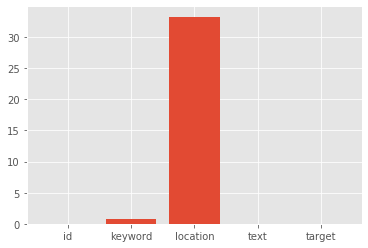

In [139]:
# Plot missing values for features

def plot_missing_values(data):
  total_records = data.shape[0]
  feature_names = data.columns.values
  missing = []
  for feature_name in feature_names:
    missing_percent = round((total_records-data[feature_name].count())/total_records * 100,2)
    missing.append(missing_percent)
  plt.bar(feature_names,missing)

plot_missing_values(tweets_test_data)

In [141]:
tweets_test_data['keyword']=tweets_test_data['keyword'].str.replace('%20','_')
tweets_test_data['keyword'].value_counts()

fatalities             45
deluge                 42
armageddon             42
body_bags              41
sinking                41
                       ..
forest_fire            19
epicentre              12
threat                 11
inundation             10
radiation_emergency     9
Name: keyword, Length: 221, dtype: int64

In [0]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='target', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Tweets')
    plt.title('% of real disaster tweets keyword wise')
    plt.xticks(ind, list(data[xtick].values), rotation=45)
    plt.legend((p1[0], p2[0]), ('tweets', 'real disaster'))
    plt.show()

In [0]:
def univariate_barplots(data, col1, col2='target', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

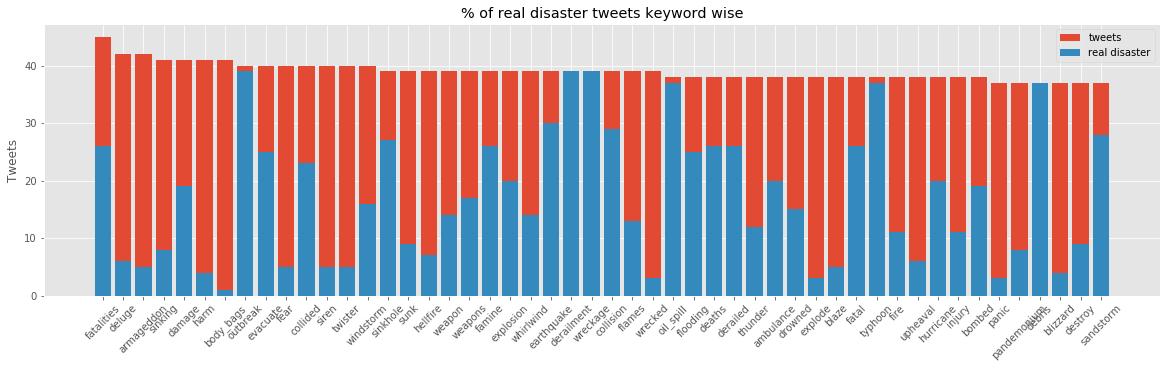

        keyword  target  total       Avg
104  fatalities      26     45  0.577778
63       deluge       6     42  0.142857
8    armageddon       5     42  0.119048
177     sinking       8     41  0.195122
57       damage      19     41  0.463415
         keyword  target  total       Avg
154  pandemonium       8     37  0.216216
62        debris      37     37  1.000000
23      blizzard       4     37  0.108108
73       destroy       9     37  0.243243
171    sandstorm      28     37  0.756757


In [144]:
univariate_barplots(tweets_test_data, 'keyword', 'target', 50)

In [149]:
tweets_test_data.groupby('location')['location'].count()

location
                          1
  Glasgow                 1
  Melbourne, Australia    1
  News                    1
  å_                      1
                         ..
å_: ?? ÌÑ ? : ?           1
å_å_Los Mina Cityã¢      1
å¡å¡Midwest Û¢Û¢        1
åÊ(?Û¢`?Û¢å«)??         1
åø\_(?)_/åø               1
Name: location, Length: 3341, dtype: int64

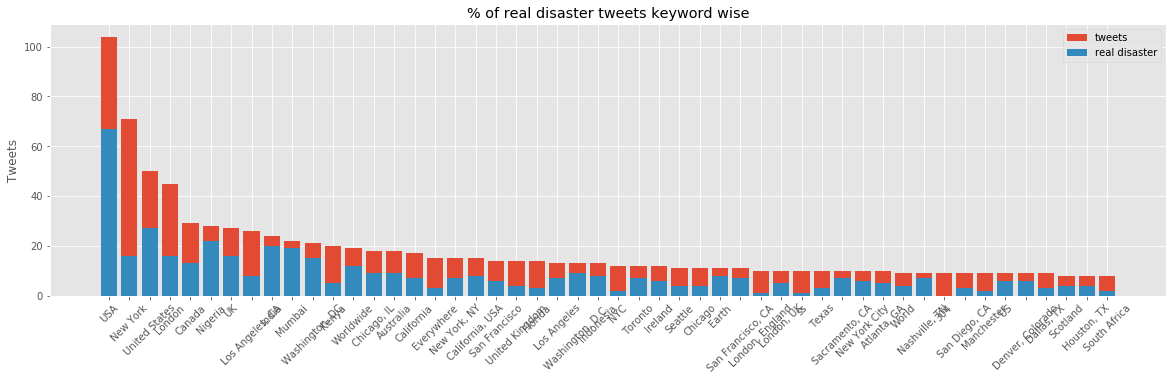

           location  target  total       Avg
2643            USA      67    104  0.644231
1826       New York      16     71  0.225352
2662  United States      27     50  0.540000
1506         London      16     45  0.355556
587          Canada      13     29  0.448276
              location  target  total       Avg
782   Denver, Colorado       6      9  0.666667
756         Dallas, TX       3      9  0.333333
2284          Scotland       4      8  0.500000
1190       Houston, TX       4      8  0.500000
2362      South Africa       2      8  0.250000


In [127]:
univariate_barplots(tweets_test_data, 'location', 'target', 50)

# EDA

Number of tweets that are real disaster 3271 , ( 42.96597924602653 %)
Number of tweets that are not real disaster  4342 , ( 57.03402075397347 %)


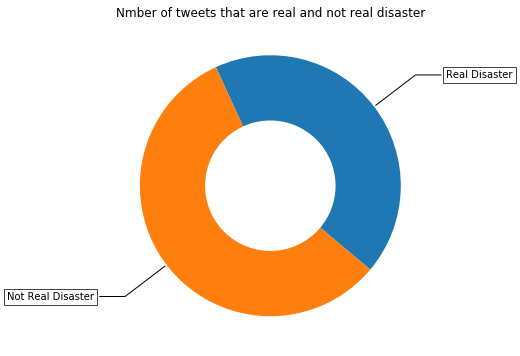

In [81]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = tweets_train_data['target'].value_counts()
print("Number of tweets that are real disaster", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of tweets that are not real disaster ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Real Disaster", "Not Real Disaster"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of tweets that are real and not real disaster")

plt.show()

# Text Preprocessing

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [0]:
# Combining all the above stundents 
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [89]:
preprocessed_tweets = preprocess_text(tweets_test_data['text'].values)

100%|██████████| 7613/7613 [00:00<00:00, 19305.78it/s]


In [94]:
# We are considering only the words which appeared in at least 10 documents(rows or tweets).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_tweets)
#print("Shape of matrix after text pre-processing ",text_bow.shape)
vectorizer.vocabulary_

{'reason': 1016,
 'earthquake': 405,
 'may': 796,
 'us': 1319,
 'forest': 508,
 'fire': 490,
 'near': 858,
 'la': 707,
 'canada': 227,
 'place': 954,
 'no': 873,
 'evacuation': 431,
 'orders': 909,
 'expected': 441,
 '13': 12,
 'people': 937,
 'wildfires': 1382,
 'california': 220,
 'got': 564,
 'sent': 1107,
 'photo': 944,
 'smoke': 1150,
 'school': 1083,
 'update': 1314,
 'hwy': 648,
 '20': 22,
 'closed': 271,
 'due': 399,
 'lake': 711,
 'county': 301,
 'flood': 500,
 'disaster': 374,
 'heavy': 607,
 'rain': 1004,
 'causes': 245,
 'flash': 497,
 'flooding': 501,
 'colorado': 282,
 'top': 1267,
 'see': 1095,
 'emergency': 418,
 'happening': 591,
 'building': 205,
 'across': 50,
 'street': 1193,
 'tornado': 1268,
 'coming': 287,
 'area': 104,
 'three': 1251,
 'died': 370,
 'heat': 606,
 'wave': 1359,
 'far': 463,
 'haha': 581,
 'south': 1165,
 'getting': 546,
 'wait': 1342,
 'second': 1092,
 'live': 750,
 'gonna': 561,
 '18': 19,
 'days': 337,
 'lost': 765,
 'myanmar': 853,
 'damage': 